In [1]:
import scipy.io as sio
import numpy as np
import os
import sys
from PIL import Image
import errno
from sklearn.decomposition import PCA


In [22]:
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

 #设置默认显示参数
plt.rcParams['figure.figsize'] = (10, 5)        # 图像显示大小
plt.rcParams['image.interpolation'] = 'nearest'  # 最近邻差值: 像素为正方形
plt.rcParams['image.cmap'] = 'gray'  # 使用灰度输出而不是彩色输出

In [3]:
mat_file = "dataset/PIE dataset/Pose05_64x64.mat"

data = sio.loadmat(mat_file)

data

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon May 08 13:10:30 2017',
 '__version__': '1.0',
 'fea': array([[ 8,  9,  9, ..., 35, 36, 42],
        [ 6,  7,  7, ..., 38, 32, 31],
        [ 8,  8,  6, ..., 26, 25, 23],
        ..., 
        [11, 10,  8, ..., 36, 40, 42],
        [ 9, 11,  9, ..., 29, 31, 36],
        [12,  9,  9, ..., 29, 34, 38]], dtype=uint8),
 'gnd': array([[ 1],
        [ 1],
        [ 1],
        ..., 
        [68],
        [68],
        [68]], dtype=uint8),
 'isTest': array([[ 0.],
        [ 0.],
        [ 0.],
        ..., 
        [ 1.],
        [ 0.],
        [ 0.]])}

In [4]:
print data['fea'].shape
img = data['fea'][3222].reshape((64,64))
print img.shape

(3332, 4096)
(64, 64)


In [6]:
def read_mat ( path ):
    c = 0
    X ,y ,isTest= [], [],[]

    for filename in os.listdir ( path ):
        if (filename != 'Thumbs.db'):
            data = sio.loadmat( os.path.join ( path , filename ))
#             np.concatenate((X, data['fea']),axis = 0)
#             np.concatenate((y, data['gnd']),axis = 0)
            if len(X) == 0 and len(y) == 0:
                X = data['fea']
                y = data['gnd']
                isTest = data['isTest']
            else:
                X = np.concatenate((data['fea'], X), axis = 0)
                y =np.concatenate((data['gnd'], y), axis = 0)
                isTest = np.concatenate((data['isTest'],isTest), axis = 0)
    return X, y, isTest

In [7]:
ROOT = 'dataset/PIE dataset/'
X,y,isTest = read_mat(ROOT)
X = np.array(X)
y = np.array(y)
isTest = np.array(isTest)

print X.shape
print X
print y.shape
print y
print isTest.shape
print isTest

(11554, 4096)
[[ 46  52  48 ..., 226 234 238]
 [ 50  39  32 ..., 255 254 254]
 [ 47  47  39 ..., 254 254 254]
 ..., 
 [ 11  10   8 ...,  36  40  42]
 [  9  11   9 ...,  29  31  36]
 [ 12   9   9 ...,  29  34  38]]
(11554, 1)
[[ 1]
 [ 1]
 [ 1]
 ..., 
 [68]
 [68]
 [68]]
(11554, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 0.]
 [ 0.]]


In [8]:
X_train, X_test, y_train, y_test = [],[],[],[]
print X_train
print y_train
for i in np.arange(len(isTest)):
    if(isTest[i] == 0):
        if len(X_train) == 0 and len(y_train) == 0:
            X_train = X[i]
            y_train = y[i]
        else:
            X_train = np.vstack((X[i], X_train))
            y_train = np.vstack((y[i], y_train))
    else:
        if len(X_test) == 0 and len(y_test) == 0:
            X_test = X[i]
            y_test = y[i]
        else:
            X_test = np.vstack((X[i], X_test))
            y_test = np.vstack((y[i], y_test))

print X_train
print X_train.shape



[]
[]
[[ 12   9   9 ...,  29  34  38]
 [  9  11   9 ...,  29  31  36]
 [  8  10  12 ...,  25  25  22]
 ..., 
 [ 47  47  39 ..., 254 254 254]
 [ 50  39  32 ..., 255 254 254]
 [ 46  52  48 ..., 226 234 238]]
(10262, 4096)


In [9]:
# show the shape of X_train X_test y_train y_test
print X_train
print X_train.shape
print X_test
print X_test.shape

y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print y_train.shape
print y_test.shape

[[ 12   9   9 ...,  29  34  38]
 [  9  11   9 ...,  29  31  36]
 [  8  10  12 ...,  25  25  22]
 ..., 
 [ 47  47  39 ..., 254 254 254]
 [ 50  39  32 ..., 255 254 254]
 [ 46  52  48 ..., 226 234 238]]
(10262, 4096)
[[ 11  10   8 ...,  36  40  42]
 [ 10  11  21 ...,  36  36  34]
 [  4   4   5 ...,  26  23  20]
 ..., 
 [ 22  21  26 ...,  48  47  44]
 [ 16  16  17 ...,  25  25  24]
 [ 98 195 181 ...,  81  76  72]]
(1292, 4096)
(10262,)
(1292,)


In [10]:
pca = PCA(n_components = 120)

#transform the training data
X_train_reduced = pca.fit_transform(X_train)
#transform the test data
X_test_reduced = pca.transform(X_test)

print X_train_reduced.shape
print X_test_reduced.shape

(10262, 120)
(1292, 120)


In [118]:
print X_train_reduced

[[ -2.43277928e+03  -6.74833478e+01  -4.87219147e+02 ...,   3.47827008e+01
   -6.60368365e+01   6.61858058e-01]
 [ -2.45639927e+03  -8.44378384e+01  -5.48539230e+02 ...,   1.70975398e+01
   -7.24146548e+01   3.46723663e+01]
 [ -2.38265682e+03  -1.36205968e+02  -4.62705791e+02 ...,   8.26893215e+00
   -3.87188503e+01   4.23500821e+01]
 ..., 
 [ -1.63355623e+03  -4.77781101e+02   1.08151789e+03 ...,  -9.28882201e+00
   -9.49885112e+01  -2.68994828e+01]
 [ -1.58247310e+03  -3.02480825e+02   8.38011677e+02 ...,   9.77514924e+01
   -6.91885998e+01  -3.70888445e+01]
 [ -1.25307688e+03  -7.75424043e+02   1.36646402e+03 ...,  -4.56336458e+01
   -6.85267242e+01   3.40972621e+00]]


In [11]:
print pca.explained_variance_ratio_

[  4.13076070e-01   2.46189590e-01   6.59698496e-02   2.66276588e-02
   1.70617489e-02   1.50870897e-02   1.23309186e-02   1.01160792e-02
   7.62331167e-03   6.89811625e-03   6.53611070e-03   6.33956234e-03
   5.68267960e-03   4.81222273e-03   4.40837025e-03   4.27961038e-03
   4.01790274e-03   3.77814676e-03   3.39784799e-03   3.17281017e-03
   3.09597493e-03   2.73255672e-03   2.71484640e-03   2.49212903e-03
   2.31407048e-03   2.23869074e-03   2.01869139e-03   1.91240912e-03
   1.86929622e-03   1.81077926e-03   1.75594079e-03   1.71005430e-03
   1.67407562e-03   1.57775026e-03   1.53216487e-03   1.49850506e-03
   1.42162500e-03   1.32996198e-03   1.30384803e-03   1.28683838e-03
   1.23169113e-03   1.20491904e-03   1.16568759e-03   1.15356042e-03
   1.10601605e-03   1.05993643e-03   1.00558412e-03   9.98067234e-04
   9.79640525e-04   9.46252428e-04   9.39584922e-04   9.25365403e-04
   8.88989282e-04   8.65835615e-04   8.50509795e-04   8.20778281e-04
   8.13319481e-04   7.97953738e-04

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()

#train
model.fit(X_train_reduced, y_train)
predictions = model.predict(X_test_reduced)

print classification_report(y_test, predictions, digits = 4)

             precision    recall  f1-score   support

          1     1.0000    1.0000    1.0000        19
          2     1.0000    1.0000    1.0000        19
          3     0.9500    1.0000    0.9744        19
          4     1.0000    1.0000    1.0000        19
          5     1.0000    0.9474    0.9730        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     0.9474    0.9474    0.9474        19
          9     0.8636    1.0000    0.9268        19
         10     0.9474    0.9474    0.9474        19
         11     1.0000    1.0000    1.0000        19
         12     1.0000    1.0000    1.0000        19
         13     0.9048    1.0000    0.9500        19
         14     0.9474    0.9474    0.9474        19
         15     1.0000    0.9474    0.9730        19
         16     0.9500    1.0000    0.9744        19
         17     0.9000    0.9474    0.9231        19
         18     1.0000    1.0000    1.0000   

In [161]:
### PCA + SVM 
from sklearn.svm import LinearSVC
SVM = LinearSVC(C=0.000000115, random_state=42)

SVM.fit(X_train_reduced, y_train)
predictions = SVM.predict(X_test_reduced)
print classification_report(y_test, predictions, digits = 4)


             precision    recall  f1-score   support

          1     1.0000    0.9474    0.9730        19
          2     1.0000    0.6316    0.7742        19
          3     1.0000    1.0000    1.0000        19
          4     0.9474    0.9474    0.9474        19
          5     0.6667    0.9474    0.7826        19
          6     0.9500    1.0000    0.9744        19
          7     1.0000    0.7895    0.8824        19
          8     1.0000    0.7895    0.8824        19
          9     0.8667    0.6842    0.7647        19
         10     0.7826    0.9474    0.8571        19
         11     0.9444    0.8947    0.9189        19
         12     0.8182    0.9474    0.8780        19
         13     0.8750    0.7368    0.8000        19
         14     1.0000    0.9474    0.9730        19
         15     0.8947    0.8947    0.8947        19
         16     0.8421    0.8421    0.8421        19
         17     0.8182    0.9474    0.8780        19
         18     1.0000    1.0000    1.0000   

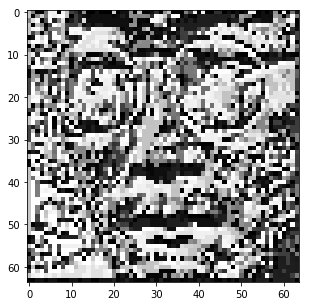

In [87]:
from skimage.feature import local_binary_pattern

## setting for LBP
radius = 1
n_points = 8 * radius

lbp = local_binary_pattern(img, n_points, radius, method = 'default')
plt.imshow(lbp, interpolation='nearest')


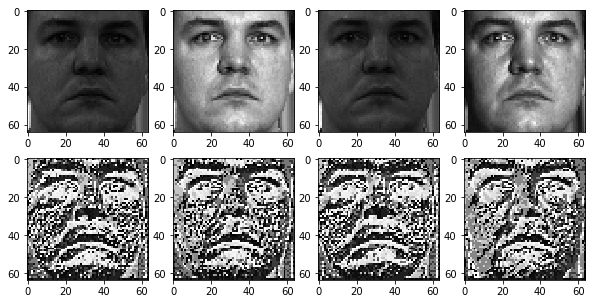

In [85]:
img1 = X_train[8000].reshape((64,64))
img2 = X_train[8010].reshape((64,64))
img3 = X_train[8040].reshape((64,64))
img4 = X_train[8030].reshape((64,64))

lbp_img1 = local_binary_pattern(img1, n_points, radius, method = 'default')
lbp_img2 = local_binary_pattern(img2, n_points, radius, method = 'default')
lbp_img3 = local_binary_pattern(img3, n_points, radius, method = 'default')
lbp_img4 = local_binary_pattern(img4, n_points, radius, method = 'default')

f, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
ax1.imshow(img1, interpolation='nearest')
ax2.imshow(img2, interpolation='nearest')
ax3.imshow(img3, interpolation='nearest')
ax4.imshow(img4, interpolation='nearest')

ax5.imshow(lbp_img1, interpolation='nearest')
ax6.imshow(lbp_img2, interpolation='nearest')
ax7.imshow(lbp_img3, interpolation='nearest')
ax8.imshow(lbp_img4, interpolation='nearest')

In [88]:
(hist, _) = np.histogram(lbp_img1.ravel(), bins= np.arange(0, n_points + 3), range=(0, n_points + 2))

In [92]:
print hist.shape
print lbp_img1.shape

(10,)
(64, 64)


In [167]:
eps = 1e-7
n_bins = 128
N = X_train.shape[0]
X_lbp_train = np.zeros((N,64,64))
hist_train = np.zeros((N,n_bins,))
for i in np.arange(N):
    X_lbp_train[i] = local_binary_pattern(X_train[i].reshape(64,64), n_points, radius, method = 'default')
    (hist_train[i], _) = np.histogram(X_lbp_train[i].ravel(), bins= n_bins, range = (0, n_bins), density=True)
    hist_train[i] = hist_train[i].astype("float")
    hist_train[i] /= (hist_train[i].sum() + eps)
    
    

In [168]:
print hist_train
print hist_train.shape

[[ 0.11446596  0.0270392   0.00495719 ...,  0.00315457  0.0193781
   0.0193781 ]
 [ 0.10914854  0.02581521  0.00634058 ...,  0.00271739  0.01947464
   0.01992753]
 [ 0.11332728  0.03037171  0.00634633 ...,  0.00317316  0.02266546
   0.0199456 ]
 ..., 
 [ 0.10942248  0.02735562  0.00455927 ...,  0.00202634  0.01519757
   0.02127659]
 [ 0.10088148  0.02742409  0.00440744 ...,  0.00342801  0.01567091
   0.01567091]
 [ 0.09935738  0.03064755  0.00692041 ...,  0.00296589  0.01581809
   0.01631241]]
(10262, 128)


In [169]:
N_test = X_test.shape[0]
X_lbp_test = np.zeros((N_test,64,64))
hist_test = np.zeros((N_test,n_bins,))
for i in np.arange(N_test):
    X_lbp_test[i] = local_binary_pattern(X_test[i].reshape(64,64), n_points, radius, method = 'default')
    (hist_test[i], _) = np.histogram(X_lbp_test[i].ravel(), bins= n_bins, range=(0, n_bins), density=True)
    hist_test[i] = hist_test[i].astype("float")
    hist_test[i] /= (hist_test[i].sum() + eps)
    
    

In [170]:
print hist_test
print hist_test.shape

[[ 0.10625843  0.03016659  0.00360198 ...,  0.0009005   0.02161188
   0.02341287]
 [ 0.09264897  0.0200087   0.00521966 ...,  0.00260983  0.0200087
   0.01783384]
 [ 0.08254269  0.02609108  0.00759013 ...,  0.00426945  0.01612903
   0.01850095]
 ..., 
 [ 0.072324    0.02266152  0.00771456 ...,  0.00192864  0.01494696
   0.01060752]
 [ 0.06748109  0.03432228  0.00290867 ...,  0.00407213  0.01628854
   0.01919721]
 [ 0.06252695  0.01854247  0.00560586 ...,  0.00086244  0.01854247
   0.01379905]]
(1292, 128)


In [171]:
from sklearn.svm import LinearSVC
SVM = LinearSVC(C=115, random_state=42)

SVM.fit(hist_train, y_train)
predictions = SVM.predict(hist_test)
print classification_report(y_test, predictions, digits = 4)

             precision    recall  f1-score   support

          1     0.1667    0.0526    0.0800        19
          2     0.2500    0.0526    0.0870        19
          3     0.2222    0.1053    0.1429        19
          4     0.4706    0.4211    0.4444        19
          5     0.8333    0.2632    0.4000        19
          6     0.3636    0.2105    0.2667        19
          7     0.3182    0.3684    0.3415        19
          8     0.0000    0.0000    0.0000        19
          9     0.2500    0.1053    0.1481        19
         10     0.2857    0.4211    0.3404        19
         11     0.3750    0.3158    0.3429        19
         12     0.2222    0.1053    0.1429        19
         13     1.0000    0.0526    0.1000        19
         14     0.0000    0.0000    0.0000        19
         15     0.2381    0.2632    0.2500        19
         16     0.2500    0.0526    0.0870        19
         17     0.3913    0.4737    0.4286        19
         18     0.3750    0.3158    0.3429   

In [172]:
print predictions
print predictions.shape
print hist_test
print hist_test.shape

[26 68 49 ..., 64 52 21]
(1292,)
[[ 0.10625843  0.03016659  0.00360198 ...,  0.0009005   0.02161188
   0.02341287]
 [ 0.09264897  0.0200087   0.00521966 ...,  0.00260983  0.0200087
   0.01783384]
 [ 0.08254269  0.02609108  0.00759013 ...,  0.00426945  0.01612903
   0.01850095]
 ..., 
 [ 0.072324    0.02266152  0.00771456 ...,  0.00192864  0.01494696
   0.01060752]
 [ 0.06748109  0.03432228  0.00290867 ...,  0.00407213  0.01628854
   0.01919721]
 [ 0.06252695  0.01854247  0.00560586 ...,  0.00086244  0.01854247
   0.01379905]]
(1292, 128)


In [173]:
model2 = LogisticRegression()

#train
model2.fit(hist_train, y_train)
predictions = model2.predict(hist_test)
print predictions
print y_test
print classification_report(y_test, predictions, digits = 4)

[10 50 26 ..., 26 22 46]
[68 68 68 ...,  1  1  1]
             precision    recall  f1-score   support

          1     0.0000    0.0000    0.0000        19
          2     0.5000    0.0526    0.0952        19
          3     0.0000    0.0000    0.0000        19
          4     0.1071    0.1579    0.1277        19
          5     0.0000    0.0000    0.0000        19
          6     0.0000    0.0000    0.0000        19
          7     0.0000    0.0000    0.0000        19
          8     0.0000    0.0000    0.0000        19
          9     0.0000    0.0000    0.0000        19
         10     0.0769    0.2105    0.1127        19
         11     0.0000    0.0000    0.0000        19
         12     0.0000    0.0000    0.0000        19
         13     0.0000    0.0000    0.0000        19
         14     0.0000    0.0000    0.0000        19
         15     0.0000    0.0000    0.0000        19
         16     0.0000    0.0000    0.0000        19
         17     0.2500    0.0526    0.0870      

In [126]:
print predictions


[16 68 49 ..., 29 52 45]
